
# Calculating Customer Lifetime Value  
### Zach Brown

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

The purpose of this exercise is to use a list of historical customer transactions to estimate future lifetime value for customers.  The input data consists of 3 fields: a hashed ID for the customer that made the transaction, a timestamp in UTC of when the transaction occurred, and a monetary purchase value of the transaction.  The dates for the transactions range from November 30, 2016 to December 6, 2017.

Before we can do anything, the data needs to be imported.

In [2]:
df = pd.read_csv('data.csv',na_values=['None'])

In [3]:
df.head()

,Id,Timestamp,PurchaseValue
0,4ec6fab0e2fca65b2950fbc9fffa45f8,2017-12-06T17:53:59Z,261.54
1,8170354d9b20f5edc7747886e7fbda90,2017-12-06T17:48:19Z,206.07
2,5780f7258e491e462611d65f1dbd1956,2017-12-06T17:46:49Z,78.84
3,e5966041d824f1bdc3ac190d49a8bbec,2017-12-06T17:46:41Z,50.42
4,52aa2478574fe7a4a78162074eb6c987,2017-12-06T17:34:56Z,274.62


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 3 columns):
Id               50001 non-null object
Timestamp        50001 non-null object
PurchaseValue    49945 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


Two things jump out after importing the data and taking a quick look.  We will need to convert the Timestamp column to a datetime format.  Also, there are 56 null PurchaseValue entries that will need to be dealt with.

In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [6]:
df.head()

,Id,Timestamp,PurchaseValue
0,4ec6fab0e2fca65b2950fbc9fffa45f8,2017-12-06 17:53:59,261.54
1,8170354d9b20f5edc7747886e7fbda90,2017-12-06 17:48:19,206.07
2,5780f7258e491e462611d65f1dbd1956,2017-12-06 17:46:49,78.84
3,e5966041d824f1bdc3ac190d49a8bbec,2017-12-06 17:46:41,50.42
4,52aa2478574fe7a4a78162074eb6c987,2017-12-06 17:34:56,274.62


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 3 columns):
Id               50001 non-null object
Timestamp        50001 non-null datetime64[ns]
PurchaseValue    49945 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.1+ MB


Ok, we've changed the data type of the TimeStamp column.  

Let's take a look at the PurchaseValue column now.

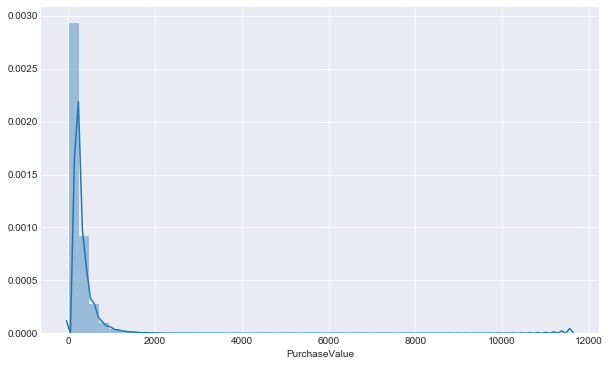

In [8]:
fig = plt.figure(figsize=(10,6))
sns.distplot(df['PurchaseValue'].dropna())

It looks like there are a few extremely large values.  Let's see if we can find out any more information about these outliers.

In [9]:
df.sort_values(by='PurchaseValue',ascending=False).head(25)

,Id,Timestamp,PurchaseValue
46769,dca76db00cc59dfbcdcc97c8bbc7f9f1,2016-12-21 19:27:53,11599.68
36562,5ac5ed64cd99ed2a8403b7a927e644ef,2017-03-31 20:57:25,5626.45
6601,98f8e41f45721cbe49a3147f6cf62432,2017-10-31 17:12:30,4680.56
14944,32df931a012f04da70265457d43e7da2,2017-08-26 17:49:58,4508.87
8336,795a8a5e5beff24e1557a6cb49a82692,2017-10-16 22:15:53,4455.39
5762,15f1f773f94ab0b1c63067f2b3d9f7be,2017-11-08 04:47:09,4181.89
23413,de9957594c13e5c1846f68b01e832c07,2017-06-28 17:01:27,3545.43
19155,c8fcdff9e08efe0b48f1e1f278c07e73,2017-07-26 03:03:46,3420.70
17468,fe403ffcf47b4efdf39874d181ae6da4,2017-08-08 02:12:15,3344.83
17307,d3a9042cdfe63cf068e9e6d92d42ba5c,2017-08-09 19:10:29,3307.93


The highest purchase value is more than double that of the next highest purchase value.  Unfortunately, without any further information about these transactions there is no way to determine whether this is a legitimate purchase or not.  If the data set included more details, such as a description of the item being purchased, it might be possible to determine if any of these large purchase values are erroneous.  Since we do not have any further details though, we will need to leave these outliers in the data set.

Now, let's deal with the null purchase values.  There are multiple ways to impute these missing values.  For example, maybe different sized purchases are typically made on different days of the week or times of the day.  We could take that into account when filling the null values.  For now though, let's just fill the null values with the mean PurchaseValue for that given customer.

In [10]:
df['PurchaseValue'] = df.groupby('Id').transform(lambda x: x.fillna(x.mean()))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 3 columns):
Id               50001 non-null object
Timestamp        50001 non-null datetime64[ns]
PurchaseValue    49966 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.1+ MB


There are still a few null purchase values.  This means that the values for all purchases made by those customers are null.  For these customers, we will simply use the mean purchase value for all customers.

In [12]:
df['PurchaseValue'].fillna(df['PurchaseValue'].mean(),inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 3 columns):
Id               50001 non-null object
Timestamp        50001 non-null datetime64[ns]
PurchaseValue    50001 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.1+ MB


In [14]:
print('Earliest Timestamp:',df['Timestamp'].min())
print('Latest Timestamp:',df['Timestamp'].max())

Earliest Timestamp: 2016-11-30 04:47:00
Latest Timestamp: 2017-12-06 17:53:59


Text(0,0.5,'Count')

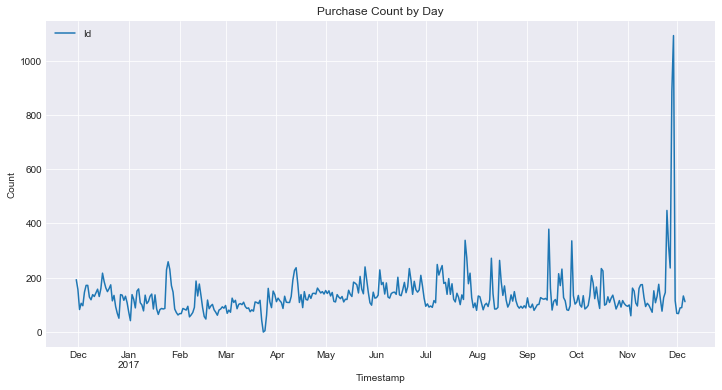

In [15]:
df_time = df.set_index('Timestamp').resample('1D').count()
df_time.drop(columns='PurchaseValue',axis=1,inplace=True)
fig = df_time.plot(figsize=(12,6),title='Purchase Count by Day')
fig.set_ylabel('Count')

When looking at the distribution of purchases by day, there is a large spike at the end of 2017.  Let's take a look at exactly which days account for the large spike in sales.

In [16]:
df['Timestamp'].groupby(df['Timestamp'].map(lambda x: x.date())).count().sort_values(ascending=False).head(10)

Timestamp
2017-11-29    1092
2017-11-28     887
2017-11-25     448
2017-09-14     379
2017-07-25     338
2017-09-28     336
2017-11-26     318
2017-07-26     274
2017-08-10     272
2017-08-15     264
Name: Timestamp, dtype: int64

We can see that the 3 highest sales days are at the end of November 2017.  Initially this seemed like there may have been an issue with the data.  However, this is right around the time of Black Friday and Cyber Monday where many retailers see their highest sales of the year.  The earliest data that we have is from right after this time period in 2016, so unfortunately we cannot compare with the previous year to see if there was a similar spike.

The raw data is in a transactional form, meaning that there is a separate row for every row and customers can be associated with multiple rows.  In order to use [Peter Fader and Bruce Hardie's BG/NBD Model](http://mktg.uni-svishtov.bg/ivm/resources/Counting_Your_Customers.pdf), this data will need to be reshaped into a Frequency/Recency Matrix.  This means that there will be one row per customer, with columns for frequency (the number of repeat purchases or total purchases minus 1), the age of the customer (time periods since the customer's first purchase), and recency (the age of the customer when they made their most recent purchase).  This is a very common issue, so luckily the [lifetimes library](https://github.com/CamDavidsonPilon/lifetimes) has a utility function that we can use to reshape our data into this form.  

In order to validate our model, we will split the transactions into a train and test set.  The lifetimes library also includes functionality to do this.

In [17]:
from lifetimes.utils import summary_data_from_transaction_data, calibration_and_holdout_data

First, we will create the overall frequency/recency matrix.  This will be used later on to determine the 100 customers with the highest projected purchases and highest projected amount spent.

In [18]:
summary = summary_data_from_transaction_data(transactions=df, customer_id_col='Id', datetime_col='Timestamp')
summary.info()
summary.head()

<class 'pandas.core.frame.DataFrame'>
Index: 23743 entries, 0001117ff1305c1fe840697166e61564 to fffc0c75aa4e82c9856616b4c84e3f13
Data columns (total 3 columns):
frequency    23743 non-null float64
recency      23743 non-null float64
T            23743 non-null float64
dtypes: float64(3)
memory usage: 742.0+ KB


,frequency,recency,T
Id,,,
0001117ff1305c1fe840697166e61564,1.0,11.0,344.0
00028502859fd7e111d88c20456b59d5,0.0,0.0,342.0
000306d200fd6e9b03de48d15348f5c2,0.0,0.0,33.0
0003f3458a6e7b495a975c2d9ddda559,2.0,285.0,343.0
000784b838b807ad589d4bc69c0c562f,0.0,0.0,210.0


Now, we need to create another frequency/recency matrix using a calibration and holdout set.  The calibration set will be used to train the model and the holdout model will be used to validate the model.

In [19]:
summary_cal_holdout = calibration_and_holdout_data(df, 'Id', 'Timestamp',
                                                  calibration_period_end='2017-09-01',
                                                  observation_period_end='2017-12-07')
summary_cal_holdout.info()
summary_cal_holdout.head()

<class 'pandas.core.frame.DataFrame'>
Index: 18750 entries, 0001117ff1305c1fe840697166e61564 to fffc0c75aa4e82c9856616b4c84e3f13
Data columns (total 5 columns):
frequency_cal        18750 non-null float64
recency_cal          18750 non-null float64
T_cal                18750 non-null float64
frequency_holdout    18750 non-null float64
duration_holdout     18750 non-null int64
dtypes: float64(4), int64(1)
memory usage: 1.5+ MB


,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
Id,,,,,
0001117ff1305c1fe840697166e61564,1.0,11.0,248.0,0.0,97
00028502859fd7e111d88c20456b59d5,0.0,0.0,246.0,0.0,97
0003f3458a6e7b495a975c2d9ddda559,1.0,2.0,247.0,1.0,97
000784b838b807ad589d4bc69c0c562f,0.0,0.0,114.0,0.0,97
000ad0f90e9fcb6ff5a0bc480cccbdb3,5.0,68.0,104.0,0.0,97


We now have a frequency/recency matrix that is split into a calibration set and a holdout set on September 1, 2017.  We will train the model on all transactions before that date and test it on the transactions after that date.  One point of note is that this matrix contains fewer customers than the overall matrix.  This is because any customers who had not purchased anything before September 1st were not included.

In [20]:
from lifetimes import BetaGeoFitter

In [21]:
bgf = BetaGeoFitter()
bgf.fit(summary_cal_holdout['frequency_cal'],
        summary_cal_holdout['recency_cal'],
        summary_cal_holdout['T_cal'])

<lifetimes.BetaGeoFitter: fitted with 18750 subjects, a: 0.94, alpha: 48.72, b: 3.50, r: 0.37>

Not every customer will have the same purchasing pattern.  For example, let's say that we have two customers that we'll call Customer A and Customer B.  customer A used to make purchases every day, but hasn't bought anything in several months.  Customer B doesn't make purchases as frequently, but generally buys something every month and their last purchase was last month.  In this example, Customer B is more likely to be "alive" (and therefore more valuable) than Customer A, even though Customer A used to make more purchases than Customer B.  This is an illustration of how frequency and recency are both important in determining customer lifetime value.  Let's visualize the relationship between frequency and recency.

In [22]:
from lifetimes.plotting import plot_frequency_recency_matrix

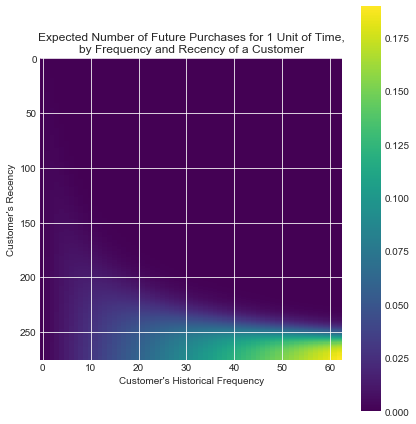

In [23]:
fig = plt.figure(figsize=(6,6))
plot_frequency_recency_matrix(bgf,cmap='viridis')
plt.tight_layout()

Looking at this plot, we can see the best customers in the lower righthand corner.  This is where frequency and recency are both the highest.  

Somebody like Customer A with a high frequency and low recency would be in the top right corner, which has a very low expected future purchase value.  Somebody like Customer B with a high recency and middling frequency would be at the bottom of the plot somewhere in the middle of the X-axis where the expected future purchases is non-zero.  

Another interesting thing to notice is that the future value of customers starts to fan out a bit on the Y-axis (Recency) as the X-axis (Frequency) decreases.  This illustrates the uncertainty that comes with new customers.  

Let's also take a look at how frequency and recency impact the probability that a customer is still active.

In [24]:
from lifetimes.plotting import plot_probability_alive_matrix

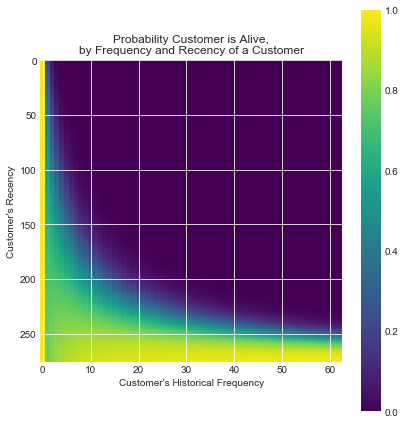

In [25]:
fig = plt.figure(figsize=(6,6))
plot_probability_alive_matrix(bgf,cmap='viridis')
plt.tight_layout()

As one might expect, a similar pattern is seen here.  As recency and frequency increase, so does the likelihood that the customer is still active.  And again, there is more uncertainty around customers with lower frequencies.  

Next, let's compare how well our model predicts purchases for the holdout set compared to the actual values.

In [26]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

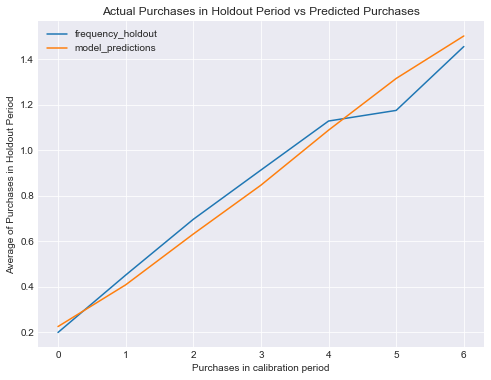

In [27]:
plot_calibration_purchases_vs_holdout_purchases(bgf,summary_cal_holdout,figsize=(8,6))

The model appears to generalize fairly well when run against the holdout set.  

Now, we can use our model to predict the number of purchases made by each customer in the next 12 months.

In [28]:
t = 365
summary['predicted_purchases'] = bgf.predict(t,summary['frequency'],summary['recency'],summary['T'])
summary.sort_values(by='predicted_purchases',ascending=False).head(100)

,frequency,recency,T,predicted_purchases
Id,,,,
a5fadc51b1ae844ad9a70ad3cfa46a64,95.0,371.0,371.0,60.718377
48a503edbaded96a3be27deee11967a1,46.0,363.0,371.0,28.675147
9f447f9415a380ac2eeee7df49c6ee7e,23.0,163.0,166.0,23.715042
5f01420f0edda6555df5ce1cc62b986c,39.0,350.0,370.0,22.163748
8d2ce54737dd404d20cadf1405d46dc8,33.0,360.0,362.0,21.424866
a62a17bb46864da2c6da691d838971b3,30.0,366.0,366.0,19.431837
3b11478939967e896ae2619615650f97,20.0,190.0,194.0,18.971988
2ad9a83ee23110d8c2f4c01600b94f20,29.0,357.0,364.0,18.508699
75fda9ea22086bf3814ff8c3f53de8ca,28.0,348.0,355.0,18.174781


These are the customers with the top 100 projected numbers of purchases over the next 12 months.  

Now that we have projections for the number of purchases that the customers will make in the next year, we can use [Fader and Hardie's Gamma-Gamma Model of Monetary Value](http://www.brucehardie.com/notes/025/gamma_gamma.pdf) to calculate Customer Lifetime Value.  First, we need to append the average transaction amount for each customer to the summary dataframe.  We will also create a subset of this data that only includes returning customers (customers with more than one transaction).

In [29]:
df_purchase_avg = pd.DataFrame(df.groupby('Id')['PurchaseValue'].mean())
summary = summary.merge(df_purchase_avg,left_index=True,right_index=True)
summary.rename(columns={'PurchaseValue':'monetary_value'},inplace=True)
returning_customers_summary = summary[summary['frequency'] > 0]

The Gamma-Gamma Model assumes that a customer's frequency and monetary value are independent of each other.  Let's check the correlation between these two fields to see if this holds true with our data.

In [30]:
returning_customers_summary[['monetary_value','frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.011513
frequency,0.011513,1.000000


Pearson's Correlation Coefficient is nearly zero between frequency and monetary value.  Therefore, the assumption that these two variables are independent of each other is most likely true and we can proceed with the Gamma-Gamma Model.

In [31]:
from lifetimes import GammaGammaFitter

In [32]:
ggf = GammaGammaFitter()
ggf.fit(returning_customers_summary['frequency'],returning_customers_summary['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 9652 subjects, p: 7.93, q: 3.87, v: 87.09>

Now that the model has been fit, we can predict the top 100 customers in terms of projected total purchase value over the next 12 months.

In [33]:
returning_customers_summary['predicted_avg_purchase'] = ggf.conditional_expected_average_profit(summary['frequency'],
                                                                                                summary['monetary_value'])
returning_customers_summary['predicted_total_spent'] = \
            returning_customers_summary['predicted_purchases'] * returning_customers_summary['predicted_avg_purchase']

In [34]:
returning_customers_summary.sort_values(by='predicted_total_spent',ascending=False).head(100)

,frequency,recency,T,predicted_purchases,monetary_value,predicted_avg_purchase,predicted_total_spent
Id,,,,,,,
a5fadc51b1ae844ad9a70ad3cfa46a64,95.0,371.0,371.0,60.718377,306.023481,305.775264,18566.177851
5ac5ed64cd99ed2a8403b7a927e644ef,23.0,222.0,250.0,14.475066,771.444615,763.221185,11047.676642
60c19a709e3ced2d16d7100eb1069df5,10.0,292.0,300.0,7.371620,1285.566364,1249.068736,9207.659881
dca76db00cc59dfbcdcc97c8bbc7f9f1,19.0,339.0,364.0,11.286749,797.443333,787.035039,8883.067235
ca2202a96c2de6ca6b8a37a4a73fa730,7.0,12.0,20.0,13.592224,655.932500,635.515389,8638.067559
a719d6643a7832535de9aded2f467825,26.0,360.0,368.0,16.444873,391.146429,389.079885,6398.369439
9cb19c3fc7311aae01cf16571b528001,17.0,263.0,279.0,12.447227,516.350000,510.602272,6355.582328
742d5a52d4df7cb14246d7f390de5d8a,21.0,340.0,356.0,13.205288,482.105652,478.014357,6312.317481
32df931a012f04da70265457d43e7da2,4.0,89.0,102.0,5.478943,1219.225000,1138.027875,6235.189612


These are the top 100 customers in terms of projected total amount spent over the next year.  This list looks different than the list of top 100 customers by projected number of purchases.  That is because customers different customers have different average purchase values.  For example, a customer who makes 100 purchases at \$1 each will spend less than a customer who only makes ten \$20 purchases.  

In order to make it easy for these projections to be referenced later, we can export them to csv files.

In [35]:
summary.sort_values(by='predicted_purchases',ascending=False).head(100).to_csv('top_100_predicted_purchases.csv')
returning_customers_summary.sort_values(by='predicted_total_spent',ascending=False).head(100).to_csv('top_100_predicted_total_spent.csv')